# Problem Statement

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.

#### Following problems must be addressed in this case study:
1. The company is finding it very difficult to sustain in the current market scenario.
2. In this case study, they have to decide to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.
3. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know. 
4. Which variables are significant in predicting the demand for shared bikes.
5. How well those variables describe the bike demands.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
#Read Data
df=pd.read_csv("day.csv")

# Data understanding, preparation and EDA

In [5]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
# Chcek the descriptive information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


#### Conclusion- Datatypes are currect.

In [7]:
#Check the descriptive statistics
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
#Check the shape of df
df.shape

(730, 16)

In [9]:
#check columns in dataset
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [10]:
#checking for null values in dataset
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Conclusion- No nulls are present.

In [11]:
#Checking for duplicates and dropping the entire duplicate row
df.duplicated().sum()

0

#### Conclusion- No duplicates.

In [12]:
#Drop those columns that are not useful
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

  1. instant column
  2. dteday column: since, we have seperate column 'yr' and 'mnth'.
  3. casual and registered columns: since, casual+registered=cnt and cnt is our target variable so we can drop
      casual and registeredcolumns.

In [13]:
#check columns in dataset
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

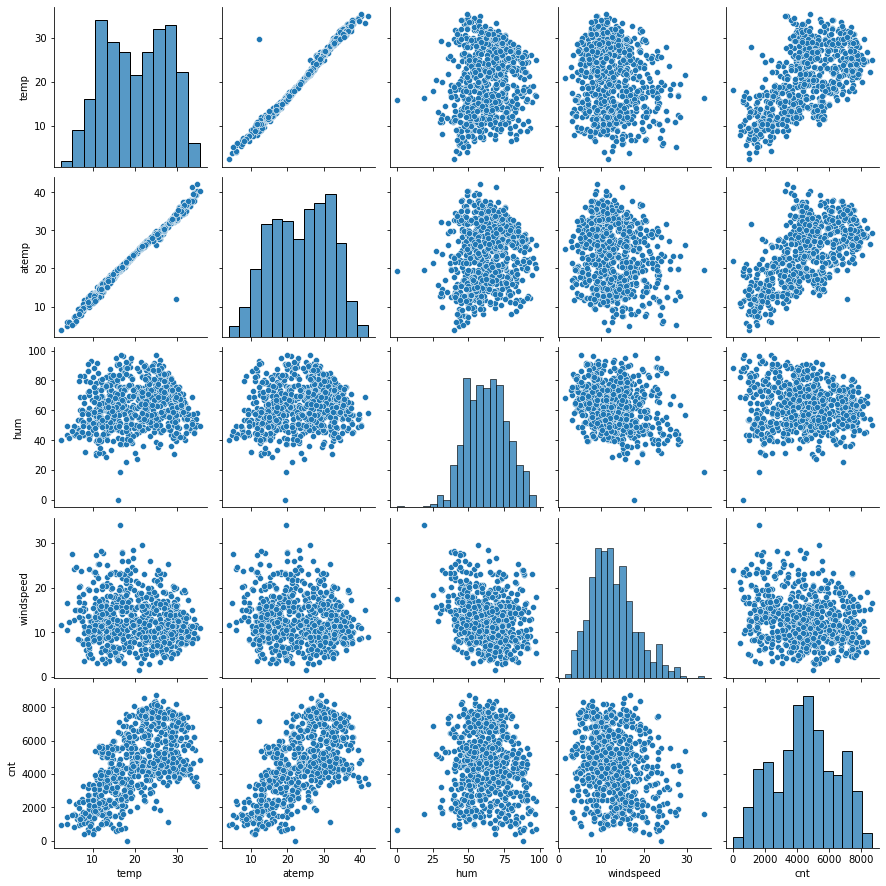

In [14]:
#Pairplots to understand numerical variables
df_num = df[['temp','atemp','hum','windspeed',"cnt"]]
sns.pairplot(df_num, vars=['temp','atemp','hum','windspeed',"cnt"])
plt.show()

<AxesSubplot:>

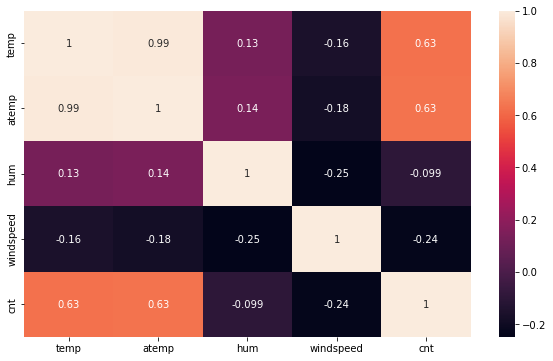

In [15]:
# Checking correlation to understand numerical variables
plt.figure(figsize = (10,6))
sns.heatmap(df_num.corr(), annot = True)

#### Conclusion- Variables temp and atemp are high correlated. Let us drop temp and consider atemp so that multicolinearity will come in the model.

In [16]:
#Drop temp and consider atemp for modelling
df.drop(['temp'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


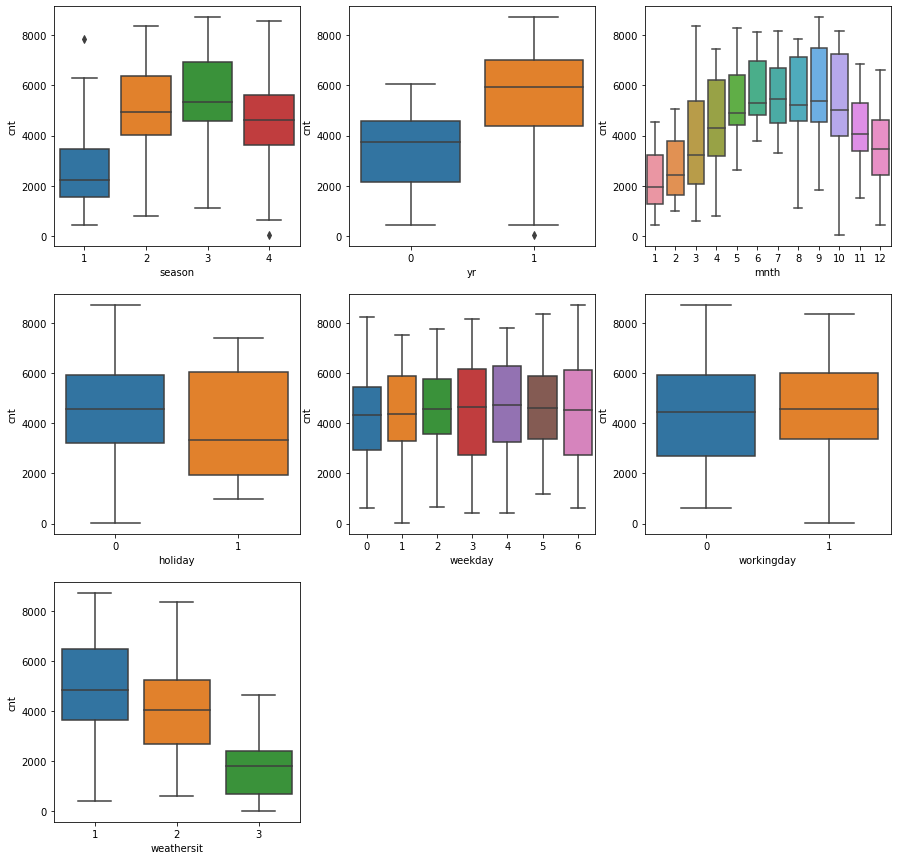

In [17]:
#Visualising categorical variables to understand data better
df_cat = df[['season','yr','mnth','holiday','weekday','workingday','weathersit','cnt']]
plt.figure(figsize=(15, 15))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_cat)
plt.subplot(3,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = df_cat)
plt.subplot(3,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = df_cat)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_cat)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_cat)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_cat)
plt.subplot(3,3,7)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_cat)
plt.show()

#### Conclusion (by seeing Data dictionary)-
1. Bike Sharing is changing with changing of season. No of counts of Bike Sharing is high for fall.
2. Bike Sharing is increasing with year. Bike Sharing is high for 2019.
3. Bike Sharing is also varing with month wise.Bike Sharing is high for September month.
4. The number of count of Bike Sharing is high for "Clear, Few clouds, Partly cloudy, Partly cloudy" in weather.

### Encoding & Visualizing the data

In [18]:
#Converting season
df.season.replace((1,2,3,4), ('s1_Spring','s2_Summer','s3_Fall','s4_Winter'), inplace=True)
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,s1_Spring,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,s1_Spring,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,s1_Spring,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349


In [19]:
#Converting mnth
df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,s1_Spring,0,Jan,0,6,0,2,18.18125,80.5833,10.749882,985
1,s1_Spring,0,Jan,0,0,0,2,17.68695,69.6087,16.652113,801
2,s1_Spring,0,Jan,0,1,1,1,9.47025,43.7273,16.636703,1349


In [20]:
#Converting weekday
df.weekday.replace((0,1,2,3,4,5,6), ('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'), inplace=True)
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,s1_Spring,0,Jan,0,Saturday,0,2,18.18125,80.5833,10.749882,985
1,s1_Spring,0,Jan,0,Sunday,0,2,17.68695,69.6087,16.652113,801
2,s1_Spring,0,Jan,0,Monday,1,1,9.47025,43.7273,16.636703,1349


In [21]:
#Converting weathersit
df.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
df.head(3)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,s1_Spring,0,Jan,0,Saturday,0,Misty,18.18125,80.5833,10.749882,985
1,s1_Spring,0,Jan,0,Sunday,0,Misty,17.68695,69.6087,16.652113,801
2,s1_Spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,1349


In [22]:
#Creating dummy variables for categorical data- season, mnth, weekday, weathersit
#Convert variables to object type
df['season']=df['season'].astype(object)
df['mnth']=df['mnth'].astype(object)
df['weekday']=df['weekday'].astype(object)
df['weathersit']=df['weathersit'].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [23]:
season_cond=pd.get_dummies(df['season'],drop_first=True)
month=pd.get_dummies(df['mnth'],drop_first=True)
day_of_week=pd.get_dummies(df['weekday'],drop_first=True)
weather_cond=pd.get_dummies(df['weathersit'],drop_first=True)

In [24]:
df=pd.concat([df,season_cond],axis=1)
df=pd.concat([df,month],axis=1)
df=pd.concat([df,day_of_week],axis=1)
df=pd.concat([df,weather_cond],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   yr              730 non-null    int64  
 2   mnth            730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   atemp           730 non-null    float64
 8   hum             730 non-null    float64
 9   windspeed       730 non-null    float64
 10  cnt             730 non-null    int64  
 11  s2_Summer       730 non-null    uint8  
 12  s3_Fall         730 non-null    uint8  
 13  s4_Winter       730 non-null    uint8  
 14  Aug             730 non-null    uint8  
 15  Dec             730 non-null    uint8  
 16  Feb             730 non-null    uint8  
 17  Jan             730 non-null    uin

In [25]:
df.head(10)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty
0,s1_Spring,0,Jan,0,Saturday,0,Misty,18.18125,80.5833,10.749882,...,0,0,0,1,0,0,0,0,0,1
1,s1_Spring,0,Jan,0,Sunday,0,Misty,17.68695,69.6087,16.652113,...,0,0,0,0,1,0,0,0,0,1
2,s1_Spring,0,Jan,0,Monday,1,Clear,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,s1_Spring,0,Jan,0,Tuesday,1,Clear,10.60610,59.0435,10.739832,...,0,0,0,0,0,0,1,0,0,0
4,s1_Spring,0,Jan,0,Wednesday,1,Clear,11.46350,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0
5,s1_Spring,0,Jan,0,Thursday,1,Clear,11.66045,51.8261,6.000868,...,0,0,0,0,0,1,0,0,0,0
6,s1_Spring,0,Jan,0,Friday,1,Misty,10.44195,49.8696,11.304642,...,0,0,0,0,0,0,0,0,0,1
7,s1_Spring,0,Jan,0,Saturday,0,Misty,8.11270,53.5833,17.875868,...,0,0,0,1,0,0,0,0,0,1
8,s1_Spring,0,Jan,0,Sunday,0,Clear,5.80875,43.4167,24.250650,...,0,0,0,0,1,0,0,0,0,0
9,s1_Spring,0,Jan,0,Monday,1,Clear,7.54440,48.2917,14.958889,...,0,0,1,0,0,0,0,0,0,0


In [26]:
df.tail()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty
725,s1_Spring,1,Dec,0,Thursday,1,Misty,11.33210,65.2917,23.458911,...,0,0,0,0,0,1,0,0,0,1
726,s1_Spring,1,Dec,0,Friday,1,Misty,12.75230,59.0000,10.416557,...,0,0,0,0,0,0,0,0,0,1
727,s1_Spring,1,Dec,0,Saturday,0,Misty,12.12000,75.2917,8.333661,...,0,0,0,1,0,0,0,0,0,1
728,s1_Spring,1,Dec,0,Sunday,0,Clear,11.58500,48.3333,23.500518,...,0,0,0,0,1,0,0,0,0,0
729,s1_Spring,1,Dec,0,Monday,1,Misty,11.17435,57.7500,10.374682,...,0,0,1,0,0,0,0,0,0,1


In [27]:
#Deleting the orginal columns season, mnth, weekday, weathersit
df.drop(['season'],axis=1,inplace=True)
df.drop(['mnth'],axis=1,inplace=True)
df.drop(['weekday'],axis=1,inplace=True)
df.drop(['weathersit'],axis=1,inplace=True)

In [28]:
df.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,s2_Summer,s3_Fall,s4_Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [29]:
df.columns

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'cnt',
       's2_Summer', 's3_Fall', 's4_Winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul',
       'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday', 'Light_rainsnow',
       'Misty'],
      dtype='object')

In [30]:
df.shape

(730, 29)

# Model building and evaluation

In [31]:
#Import Machine learning Libraries
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [32]:
#Train and test split
df_train, df_test = train_test_split(df, train_size = 0.70, random_state = 100)

In [33]:
df_train.shape

(510, 29)

In [34]:
df_test.shape

(220, 29)

In [35]:
#Scaling the numerical data
scaler=MinMaxScaler()

In [36]:
num_vars=['atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [37]:
# Checking values after scaling
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,s2_Summer,s3_Fall,s4_Winter,...,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_rainsnow,Misty
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [38]:
#Creating X and y
X_train = df_train
y_train = df_train.pop('cnt')

### Model 1

In [39]:
# RFE approach for variable selection
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [40]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('s2_Summer', True, 1),
 ('s3_Fall', False, 4),
 ('s4_Winter', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 2),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('Jul', False, 7),
 ('Jun', False, 6),
 ('Mar', False, 14),
 ('May', False, 5),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 8),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 12),
 ('Light_rainsnow', True, 1),
 ('Misty', True, 1)]

In [41]:
# Selected variables
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 's2_Summer',
       's4_Winter', 'Aug', 'Feb', 'Jan', 'Sep', 'Saturday', 'Light_rainsnow',
       'Misty'],
      dtype='object')

In [42]:
# Unselected variables
X_train.columns[~rfe.support_]

Index(['s3_Fall', 'Dec', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [43]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [44]:
# Creating a constnt variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [45]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [46]:
# Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     177.5
Date:                Tue, 10 May 2022   Prob (F-statistic):          8.05e-188
Time:                        11:00:55   Log-Likelihood:                 511.81
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     494   BIC:                            -923.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2208      0.032      6.

In [47]:
# Check VIF values for selected variables
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,64.12
4,atemp,2.32
8,s4_Winter,1.96
11,Jan,1.93
5,hum,1.89
3,workingday,1.88
13,Saturday,1.79
7,s2_Summer,1.71
15,Misty,1.57
10,Feb,1.54


### Model 2

In [48]:
# Drop the mnth_feb from the model 1 since it has high p-value.
X_train_rfe=X_train_rfe.drop(['Feb'],axis=1)

In [49]:
X_train_lm1 = sm.add_constant(X_train_rfe)

In [50]:
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [51]:
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 10 May 2022   Prob (F-statistic):          1.52e-188
Time:                        11:01:12   Log-Likelihood:                 510.80
No. Observations:                 510   AIC:                            -991.6
Df Residuals:                     495   BIC:                            -928.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2064      0.030      6.

In [52]:
# Check VIF values for selected variables
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,57.44
4,atemp,1.91
5,hum,1.89
3,workingday,1.88
12,Saturday,1.78
14,Misty,1.57
8,s4_Winter,1.56
10,Jan,1.55
7,s2_Summer,1.49
9,Aug,1.42


In [53]:
# Check the parameters
lr1.params

const             0.206409
yr                0.230715
holiday          -0.053246
workingday        0.043685
atemp             0.533900
hum              -0.163543
windspeed        -0.171331
s2_Summer         0.093733
s4_Winter         0.130723
Aug               0.063625
Jan              -0.041388
Sep               0.121175
Saturday          0.052346
Light_rainsnow   -0.238340
Misty            -0.056915
dtype: float64

### Model 3

In [54]:
# Drop the holiday from the model 2 since it has high p-value.
X_train_rfe=X_train_rfe.drop(['holiday'],axis=1)

In [55]:
X_train_lm2 = sm.add_constant(X_train_rfe)

In [56]:
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [57]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.8
Date:                Tue, 10 May 2022   Prob (F-statistic):          6.87e-189
Time:                        11:01:17   Log-Likelihood:                 508.85
No. Observations:                 510   AIC:                            -989.7
Df Residuals:                     496   BIC:                            -930.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1971      0.030      6.

In [58]:
# Check VIF values for selected variables
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,56.00
3,atemp,1.91
4,hum,1.89
2,workingday,1.65
11,Saturday,1.65
13,Misty,1.57
7,s4_Winter,1.56
9,Jan,1.55
6,s2_Summer,1.48
8,Aug,1.42


### VALIDATE ASSUMPTIONS

1. Residual Analysis Of Training Data

In [59]:
y_train_pred = lr2.predict(X_train_lm2)

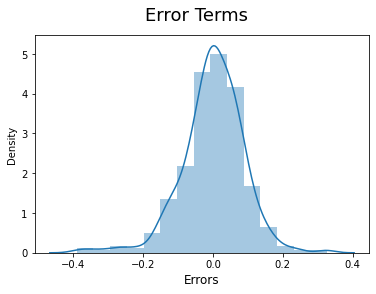

In [60]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 15)
fig.suptitle('Error Terms', fontsize = 18)              
plt.xlabel('Errors', fontsize = 12)  
plt.show()

#### Conclusion- Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

2. Homoscedasticity

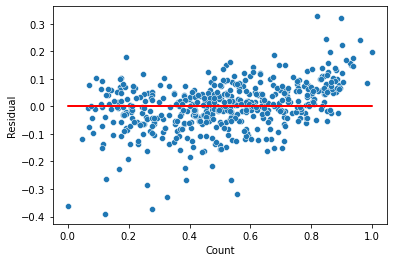

In [61]:
sns.scatterplot(y_train,res)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

#### Conclusion-There is no visible pattern in residual values, thus homoscedacity is well preserved.

3. Multicolinearity

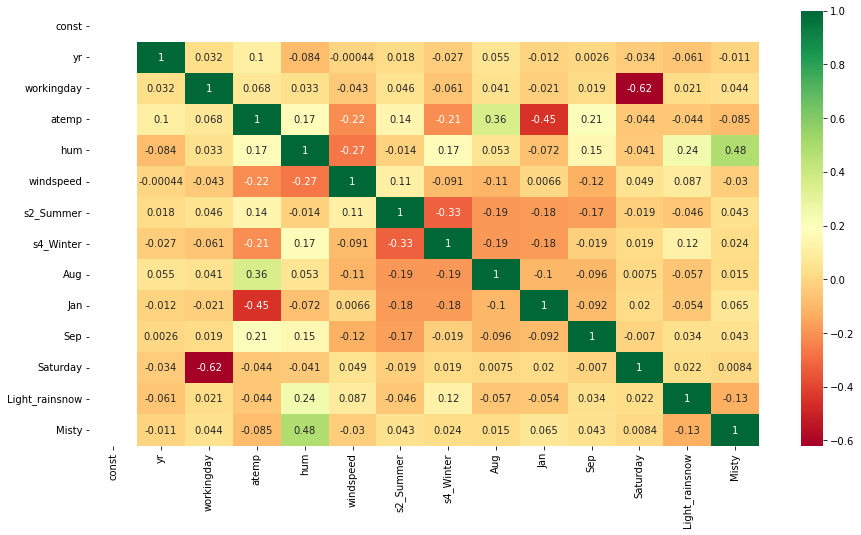

In [62]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_lm2.corr(),annot = True, cmap="RdYlGn")
plt.show()

#### Conclusion- There is no strong correlation between variables.

## Predictions on the Test set

In [63]:
#Scaling the test data
num_vars=['atemp','hum','windspeed','cnt']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [64]:
#Creating x and y sets
y_test = df_test.pop('cnt')
X_test = df_test

In [65]:
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'atemp', 'hum', 'windspeed', 's2_Summer',
       's4_Winter', 'Aug', 'Jan', 'Sep', 'Saturday', 'Light_rainsnow',
       'Misty'],
      dtype='object')

In [66]:
# Dropping the 'const' columns
X_train_rfe=X_train_rfe.drop(['const'], axis=1)

In [67]:
#Selecting the variables that were part of final model.
col1=X_train_rfe.columns

X_test=X_test[col1]

# Adding constant variable to test dataframe
X_test_lm2 = sm.add_constant(X_test)

X_test_lm2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   const           220 non-null    float64
 1   yr              220 non-null    int64  
 2   workingday      220 non-null    int64  
 3   atemp           220 non-null    float64
 4   hum             220 non-null    float64
 5   windspeed       220 non-null    float64
 6   s2_Summer       220 non-null    uint8  
 7   s4_Winter       220 non-null    uint8  
 8   Aug             220 non-null    uint8  
 9   Jan             220 non-null    uint8  
 10  Sep             220 non-null    uint8  
 11  Saturday        220 non-null    uint8  
 12  Light_rainsnow  220 non-null    uint8  
 13  Misty           220 non-null    uint8  
dtypes: float64(4), int64(2), uint8(8)
memory usage: 13.8 KB


In [68]:
#Making predictions on the chosen model
y_pred = lr2.predict(X_test_lm2)

## Evaluation on the Test set

Text(0, 0.5, 'y_pred')

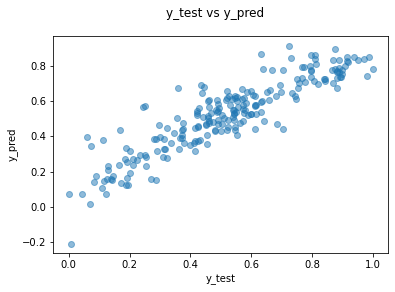

In [69]:
# plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(y_test, y_pred,alpha = 0.5)
fig.suptitle('y_test vs y_pred')             
plt.xlabel('y_test')                          
plt.ylabel('y_pred')

### R-square value for Test set

In [70]:
r2_score(y_test, y_pred)

0.8058504441671375

### Adjusted R-square value for Test set

In [71]:
X_test.shape

(220, 13)

In [72]:
# n is the number of rows in X
n = X_test.shape[0]

# p is the number of variables in X
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
r2 = 0.8058504441671375

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.793598287731083

#### conclusion- Train R^2 = 0.842, Train Adjusted R^2 = 0.837 and Test R^2 = 0.806, Test Adjusted R^2 = 0.794
This seems to be a really good model.

# Summary of Model

In [73]:
lr2.params

const             0.197059
yr                0.230870
workingday        0.051581
atemp             0.535687
hum              -0.162506
windspeed        -0.172014
s2_Summer         0.094228
s4_Winter         0.130271
Aug               0.063807
Jan              -0.041914
Sep               0.119257
Saturday          0.060364
Light_rainsnow   -0.237434
Misty            -0.056611
dtype: float64

#### As per the final model, The top 3 predictor variables that influences the bike booking are:
-  Feeling Temperature(atemp): A coefficient value of ‘0.535’ indicates that a temperature has significant impact on bike rentals.
-  Light_rainsnow: A coefficient value of ‘-0.237’ indicates that the light snow and rain deters people from renting out bikes.
-  Year (yr): A coefficient value of ‘0.231’ indicates that a year wise the rental numbers are increasing.
-  Demands increases in the month of Aug, Sep, season of Summer, Winter, day of Saturday, yr.
-  Demands decreases in the month of Jan, Light_rainsnow, Misty, hum, windspeed.
